# conversation analyzer!

What this can do so far: Trends in how many messages sent, trends in word usage. 

What I hope to add soon: Text classification, tracking conversation threads, trends in sentiment (positive, negative, and neutral)

To use: Replace author1 and author2 with the usernames of the two people in the dm.

## imports

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
convos = pd.read_csv('') # insert conversation data csv
convos = convos.drop('Attachments', axis = 1)
convos = convos.drop('Reactions', axis = 1)
convos = convos.drop('AuthorID', axis = 1)
pd.reset_option('all')
pd.set_option('display.max_rows', 500) # edit if you'd like

## finding all messages in a date range

In [3]:
start_date = '2018-06-13T00:00:00.0000000-00:00'
end_date = '2024-08-05T00:00:00.0000000-00:00'

filter_convos = convos.loc[(convos.Date > start_date) & (convos.Date < end_date)]
filter_convos

new_convos = pd.DataFrame({
    'Date': filter_convos.Date.values,
    'Author': filter_convos.Author.values,
    'Content': filter_convos.Content.values
})

new_convos.reset_index(drop=True, inplace=True)
new_convos

,Date,Author,Content
0,2018-06-13T17:19:39.4910000-07:00,televidalia,hey
1,2018-06-13T17:19:49.9540000-07:00,vadh,hi
2,2018-06-13T17:20:09.5290000-07:00,televidalia,i have to go to math class in a couple of minutes
3,2018-06-13T17:20:10.5260000-07:00,televidalia,bye lol
4,2018-06-13T17:20:57.6410000-07:00,vadh,bye
...,...,...,...
446232,2024-07-31T23:49:00.3220000-07:00,vadh,satvika tejas
446233,2024-07-31T23:50:05.3000000-07:00,televidalia,so sweet but
446234,2024-07-31T23:50:12.5380000-07:00,televidalia,i don’t know if i can get the car or
446235,2024-07-31T23:50:18.0690000-07:00,televidalia,drive it far enough


## count instances of a word in a period of time

In [4]:
start_date = '2018-06-13T00:00:00.0000000-00:00'
end_date = '2024-08-05T00:00:00.0000000-00:00'

word_to_count = "hello" 
instances = []
count = convos.loc[(convos.Date > start_date) & (convos.Date < end_date)].Content.astype(str).str.contains(word_to_count, case=False, na=False).sum()
count

1565

## messages sent over time

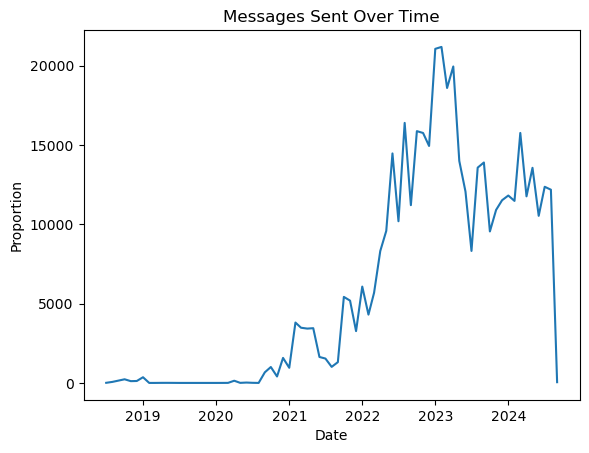

In [5]:
convos['Date'] = pd.to_datetime(convos['Date'], utc=True)

monthly_totals = convos.groupby(pd.Grouper(key='Date', freq='M')).size() 

plt.plot(monthly_totals.index, monthly_totals.values)
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title(f'Messages Sent Over Time')
plt.show()

## trends in word/phrase use by person

In [1]:
convos['Date'] = pd.to_datetime(convos['Date'], utc=True)

word_to_count = 'word' # input word you want to observe!

convos['Keyword_Count'] = convos['Content'].str.contains(word_to_count, case=False)

monthly_totals = convos.groupby(pd.Grouper(key='Date', freq='M')).size()
monthly_totals = monthly_totals.replace(0, float('nan'))

author1_keyword_counts = convos[convos['Author'] == 'author1'].groupby(pd.Grouper(key='Date', freq='M'))['Keyword_Count'].sum()
author2_keyword_counts = convos[convos['Author'] == 'author2'].groupby(pd.Grouper(key='Date', freq='M'))['Keyword_Count'].sum()

author1_proportions = author1_keyword_counts / monthly_totals
author2_proportions = author2_keyword_counts / monthly_totals

plt.plot(author1_proportions.index, author1_proportions.values, label='author1')
plt.plot(author2_proportions.index, author2_proportions.values, label='author2')

plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title(f'Monthly Proportion of Messages Containing "{word_to_count}" Over Time')
plt.legend()



NameError: name 'pd' is not defined

## trends in word/phrase use overall

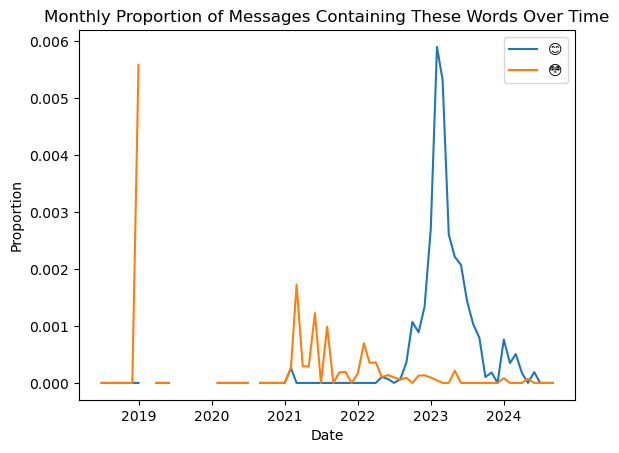

In [7]:
# word 1

convos['Date'] = pd.to_datetime(convos['Date'], utc=True)

word_to_count = '😊' 

convos['Keyword_Count'] = convos['Content'].str.contains(word_to_count, case=False)

monthly_totals = convos.groupby(pd.Grouper(key='Date', freq='M')).size()

monthly_keyword_counts = convos.groupby(pd.Grouper(key='Date', freq='M'))['Keyword_Count'].sum()

monthly_totals = monthly_totals.replace(0, float('nan'))  

monthly_proportions = monthly_keyword_counts / monthly_totals

plt.plot(monthly_proportions.index, monthly_proportions.values, label = word_to_count)
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.title(f'Monthly Proportion of Messages Containing These Words Over Time')


# word 2 

convos['Date'] = pd.to_datetime(convos['Date'], utc=True)

word_to_count = '😳' 

convos['Keyword_Count'] = convos['Content'].str.contains(word_to_count, case=False)

monthly_totals = convos.groupby(pd.Grouper(key='Date', freq='M')).size()

monthly_keyword_counts = convos.groupby(pd.Grouper(key='Date', freq='M'))['Keyword_Count'].sum()

monthly_totals = monthly_totals.replace(0, float('nan'))  

monthly_proportions = monthly_keyword_counts / monthly_totals

plt.plot(monthly_proportions.index, monthly_proportions.values, label = word_to_count)

plt.legend()
plt.show()

## proportion of messages sent by author1 vs. author2

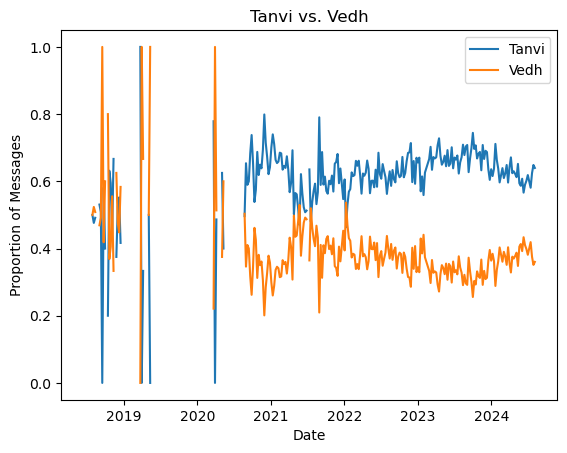

In [8]:
convos['Date'] = pd.to_datetime(convos['Date'], utc=True)

monthly_totals = convos.groupby(pd.Grouper(key='Date', freq='W')).size()

sent_by_author1 = convos[convos['Author'] == 'author1'].groupby(pd.Grouper(key='Date', freq='W')).size()

sent_by_author2 = convos[convos['Author'] == 'author2'].groupby(pd.Grouper(key = 'Date', freq = 'W')).size()

monthly_totals = monthly_totals.replace(0, float('nan')) 

author1_proportion = sent_by_author1/monthly_totals

author2_proportion = sent_by_author2/monthly_totals

plt.plot(author1_proportion.index, author1_proportion.values, label = 'author1') # blue

plt.plot(author2_proportion.index, author2_proportion.values, label = 'author2') # orange

plt.legend()

plt.xlabel('Date')
plt.ylabel('Proportion of Messages')
plt.title(f'author1 vs. author2')
plt.show()


In [9]:
convos = convos.drop('Keyword_Count', axis = 1)

## day summaries (WIP)

retrieve all messages from one day

In [10]:
date = '2022-08-14'
start_time = f'{date}T00:00:00.0000000-00:00'
end_time = f'{date}T23:59:59.9999999-00:00'

filter_convos = convos.loc[(convos.Date > start_time) & (convos.Date < end_time)]
filter_convos

new_convos = pd.DataFrame({
    'Author': filter_convos.Author.values,
    'Content': filter_convos.Content.values
})

new_convos.reset_index(drop=True, inplace=True)
new_convos

,Author,Content
0,vadh,GLASSES TANVI
1,televidalia,rn
2,vadh,glasses??
3,televidalia,yea
4,televidalia,i always wear them at home
5,vadh,🤓🤓🤓
6,televidalia,MEMEMEME
7,vadh,goofy ahh
8,televidalia,NaN
9,televidalia,NaN


(this crashes my computer, but when i get an open ai token it's over for y'all)

## conversation topic clustering

In [11]:
convos = pd.read_csv("") # insert conversation data csv
convos = convos.drop('Attachments', axis = 1)
convos = convos.drop('Reactions', axis = 1)
convos = convos.drop('AuthorID', axis = 1)

start_date = '2022-09-01T00:00:00.0000000-00:00'
end_date = '2022-10-01T00:00:00.0000000-00:00'
convos = convos.loc[(convos.Date > start_date) & (convos.Date < end_date)]
convos = convos.reset_index(drop = True)

In [13]:
stop_words = set(stopwords.words('english')) 
custom_stop_words = {'in', 'on', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
                     'into', 'through', 'during', 'before', 'after', 'above', 'below',
                     'to', 'from', 'up', 'down', 'over', 'under', 'again', 'further',
                     'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
                     'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
                     'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
                     'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now',
                     'idk', 'bc', 'oh', 'yeah', 'think', 'know', 'one', 'yes', 'no', 'abt', 'im',
                     'm', 'really', 'want', 'thing', 'still', 'going', 'yea', 'good', 'mhm', 
                     'go', 'feel', 'said', 'much', 'say', 'll', 'dont', 'didn', 'real', 
                     'right', 'ok', 'okay', 'wait', 'true', 'fr', 'thats', 'ig', 'went', 'got', 
                     'way', 'like', 'maybe', 'wdym', 'hes', 'nice', 'ill', 'wa', 'yo', 'ur', 'youre', 
                     '1230', 'na', 'gon', "noo", "tbh", "90", "hm", "well", "see", "might", "pls", "ive"
} 

# feel free to edit this list for words you don't want to factor into the clustering.

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words and word not in custom_stop_words]
    return " ".join(words)

texts = convos['Content'].dropna().reset_index(drop=True).apply(preprocess_text)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=5, ngram_range=(1, 3))
X = vectorizer.fit_transform(texts)

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(X)

convos['cluster'] = pd.Series(kmeans.labels_, index=texts.index)

def get_top_terms_per_cluster(kmeans, vectorizer, num_terms=10):
    terms = vectorizer.get_feature_names_out()
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    top_terms = {}
    for i in range(num_clusters):
        top_terms[i] = [terms[ind] for ind in order_centroids[i, :num_terms]]
    return top_terms

top_terms = get_top_terms_per_cluster(kmeans, vectorizer)

for cluster_num, terms in top_terms.items():
    print(f"Cluster {cluster_num}: {', '.join(terms)}")


Cluster 0: omg, yay, istj, friends, look, works, songs, guy, literally, kid
Cluster 1: lmao, time, bad, people, stuff, school, remember, sorry, mean, funny
Cluster 2: pranav, minnie, aarush, pranav minnie, pranav aarush, talking, says, samyukta, agastya, stuff
Cluster 3: actually, cousin, kids, feels, lot, hate, pretty, cool, shittalk, black
Cluster 4: aunty, social, told, wants, need, hang, son, tried, rahul, make
Cluster 5: wont, care, stop, let, theyre, elaborate, remind, able, judge, doubt
Cluster 6: aw, haha, thank, rishi, hahaha, cute, girlie, youve, fortnite, forget
Cluster 7: shit, ton, goofy, grades, couples, future, gpa, aesthetic, leave, ah
Cluster 8: slay, queer, mom, youve, fortnite, forever, forget, forgot, formal, forward
Cluster 9: mom, dad, shes, pranay, similar, nidhi, mad, says, making, mom mad


In [15]:
# cluster distribution (need to figure out how to get a more even cluster distribution)
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print(cluster_counts)

1    15392
9      119
0      103
2       99
3       71
6       41
5       33
8       31
7       30
4        9
Name: count, dtype: int64


In [16]:
# print columns of text in different clusters

cluster = 2 # change based on which cluster you want to look at
convos[convos.cluster == cluster]

,Author,Date,Content,cluster
28,vadh,2022-09-01T00:04:19.1330000-07:00,pranav wrote a whole diary page abt it,2.0
102,vadh,2022-09-01T11:46:49.8660000-07:00,pranav and minnie have interesting conversatio...,2.0
247,televidalia,2022-09-01T19:41:42.0130000-07:00,happy journey!,2.0
271,televidalia,2022-09-01T21:29:24.5110000-07:00,and they were talking abt that,2.0
439,televidalia,2022-09-02T19:36:06.8430000-07:00,bisper,2.0
1332,televidalia,2022-09-04T18:34:37.8720000-07:00,not so long long distance,2.0
1738,vadh,2022-09-05T00:25:02.2010000-07:00,even aarush had exposure to her in leadership,2.0
1898,televidalia,2022-09-05T10:06:37.7400000-07:00,pamcake,2.0
2337,televidalia,2022-09-05T22:44:10.6400000-07:00,my mom thinks,2.0
2339,televidalia,2022-09-05T22:44:20.5030000-07:00,i thought,2.0


## word cloud

In [19]:
convos = pd.read_csv("")
start_date = '2022-08-01T00:00:00.0000000-00:00' # edit start and end date
end_date = '2022-09-01T00:00:00.0000000-00:00'
convos = convos.loc[(convos.Date > start_date) & (convos.Date < end_date)]

text_data = ' '.join(convos['Content'].astype(str))

# Define custom stop words
custom_stop_words = {'in', 'on', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
                     'into', 'through', 'during', 'before', 'after', 'above', 'below',
                     'to', 'from', 'up', 'down', 'over', 'under', 'again', 'further',
                     'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
                     'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
                     'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
                     'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now',
                     'idk', 'bc', 'oh', 'yeah', 'think', 'know', 'one', 'yes', 'no', 'abt', 'im',
                     'm', 'really', 'want', 'thing', 'still', 'going', 'yea', 'good', 'mhm', 
                     'go', 'feel', 'said', 'much', 'say', 'll', 'dont', 'didn', 'real', 
                     'right', 'ok', 'okay', 'wait', 'true', 'fr', 'thats', 'ig', 'went', 'got', 
                     'way', 'like', 'maybe', 'wdym', 'hes', 'nice', 'ill', 'wa', 'yo', 'ur', 'youre', 
                     '1230', 'na', 'time', 'year', 'gon', 'https', 'tenor', 'u', 're', 'nan', 'well', 
                     'tho'
}

custom_stop_words = STOPWORDS.union(custom_stop_words)

# Generate the word cloud
wordcloud = WordCloud(stopwords=custom_stop_words, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'STOPWORDS' is not defined